In [4]:
from radas import run_experiment, get_ray_results_dir
import ray.tune as tune
from v5_MNIST_radas import trainable
import torch

results = await run_experiment(
    user_name="mengfan",
    experiment_name="复现论文",
    param_space=dict(
        seed = tune.grid_search([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),

    ),
    # IMPORTANT: when using cluster, your trainable cannot be defined in this script, but has to be defined in a separate file, and imported in this script
    trainable=trainable,
    # When use cluster, local_storage_path needs to be specified in this way
    local_storage_path=get_ray_results_dir(),
    # Specify the cluster to use
    run_with="cluster:atol-gpu-5090",
    # Specify gram per trial
    cpu_per_trial=1,
    # If the gram_per_trial you set is larger than GRAM of a single GPU, you will be allocated with more than one GPUs
    # to fit your need. But in this case, you will need to handle how do you want to distribute your workload to these multiple GPUs
    # To check GRAM of a single GPU, use the following code:
    # from radas.clusters import gram_per_gpu
    #
    runtime_env={
        "pip": ["emoji","scikit-learn"],
        # for more runtime_env specifications, see https://docs.ray.io/en/latest/ray-core/handling-dependencies.html#api-reference
    },
    #
    instant_gpu_allocation=1,
)

[INFO]: Checking if the experiment exists...
[Choices]: Choose an option by number:
[1]: run -- Run a new experiment (if there is a running experiment, it will be stopped; if there is a existing experiment in the storage, it will be removed)
 2 : restore -- Restore an existing experiment from the storage (if there is a running experiment, it will be stopped)
 3 : attach -- Attach to a running experiment
 4 : stop_attach -- Stop and attach to a running experiment
>>> [1]: Run a new experiment (if there is a running experiment, it will be stopped; if there is a existing experiment in the storage, it will be removed)
[INFO]: 🚀 正在测试代理连接...
[INFO]: ✅ 代理连接成功


2025-12-24 15:20:34,778	INFO dashboard_sdk.py:355 -- Uploading package gcs://_ray_pkg_614cabdcf46d4023.zip.
2025-12-24 15:20:34,780	INFO packaging.py:588 -- Creating a file package for local module '/mnt/data/home/mengfan/projects/BiPCN/BiPCN/v5'.
2025-12-24 15:20:34,870	INFO dashboard_sdk.py:402 -- Package gcs://_ray_pkg_4588c91f8f921f3a.zip already exists, skipping upload.


[INFO]: Submitting job...
[INFO]: Job submitted.
[INFO]: Tailing experiment logs below 👇👇👇
2025-12-24 02:20:34,833	INFO job_manager.py:531 -- Runtime env is setting up.

  0%|          | 0/40 [00:00<?, ?file/s]
rm_local_folder: mengfan/复现论文/trainable_ee8dc_00001_1_activation=relu,alpha_disc=1.0000,batch_size=256,epochs=50,hidden_dims=128_128,lr_theta=0.0010,lr_x=0.0200_2025-12-23_23-06-32/params.pkl:   0%|          | 0/40 [00:00<?, ?file/s]
rm_local_folder: mengfan/复现论文/trainable_ee8dc_00001_1_activation=relu,alpha_disc=1.0000,batch_size=256,epochs=50,hidden_dims=128_128,lr_theta=0.0010,lr_x=0.0200_2025-12-23_23-06-32/result.json:   0%|          | 0/40 [00:00<?, ?file/s]
rm_local_folder: mengfan/复现论文/trainable_ee8dc_00001_1_activation=relu,alpha_disc=1.0000,batch_size=256,epochs=50,hidden_dims=128_128,lr_theta=0.0010,lr_x=0.0200_2025-12-23_23-06-32/params.json:   0%|          | 0/40 [00:00<?, ?file/s]
rm_local_folder: mengfan/复现论文/trainable_ee8dc_00001_1_activation=relu,alpha_disc=1.00

In [5]:
results["df"]

,device,torch.cuda.is_available,config/seed,config/batch_size,config/epochs,config/layers,config/m,config/lr_activity,config/lr_weight,config/lambda_target,...,epoch_49/train_acc,epoch_49/test_acc,epoch_50/train_loss,epoch_50/train_acc,epoch_50/test_acc,final/train_loss,final/train_acc,final/test_acc,training_iteration,config/experiment_name
0,cuda,True,1,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993533,0.9750,0.001160,0.993983,0.9758,0.001160,0.993983,0.9758,1,复现论文
1,cuda,True,2,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993500,0.9745,0.001161,0.993667,0.9758,0.001161,0.993667,0.9758,1,复现论文
2,cuda,True,3,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993383,0.9774,0.001199,0.993467,0.9768,0.001199,0.993467,0.9768,1,复现论文
3,cuda,True,0,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993283,0.9746,0.001226,0.993617,0.9744,0.001226,0.993617,0.9744,1,复现论文
4,cuda,True,7,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993733,0.9754,0.001168,0.994050,0.9751,0.001168,0.994050,0.9751,1,复现论文
5,cuda,True,5,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993883,0.9758,0.001136,0.994133,0.9750,0.001136,0.994133,0.9750,1,复现论文
6,cuda,True,8,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993300,0.9753,0.001187,0.993650,0.9742,0.001187,0.993650,0.9742,1,复现论文
7,cuda,True,4,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993683,0.9761,0.001167,0.993900,0.9766,0.001167,0.993900,0.9766,1,复现论文
8,cuda,True,6,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993433,0.9742,0.001211,0.993600,0.9754,0.001211,0.993600,0.9754,1,复现论文
9,cuda,True,9,64,50,"[784, 128, 64, 10]",15,0.03,0.03,0.7,...,0.993083,0.9745,0.001189,0.993400,0.9746,0.001189,0.993400,0.9746,1,复现论文


Best seed = 3


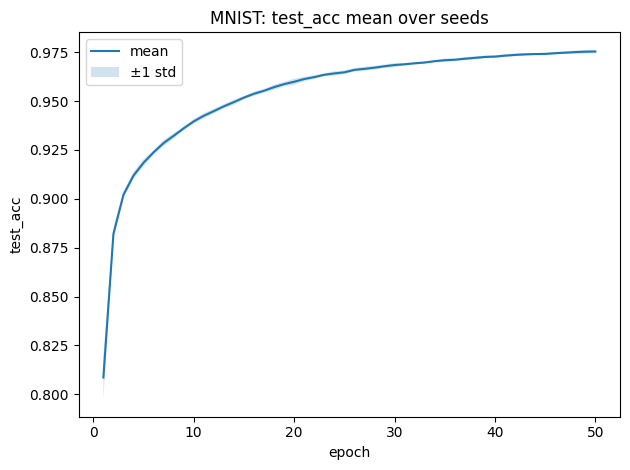

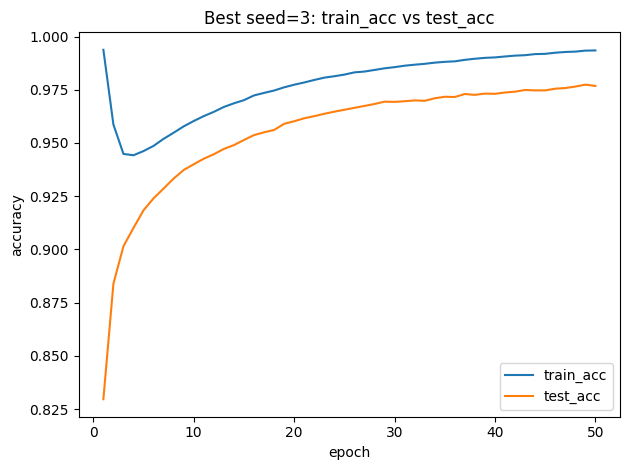

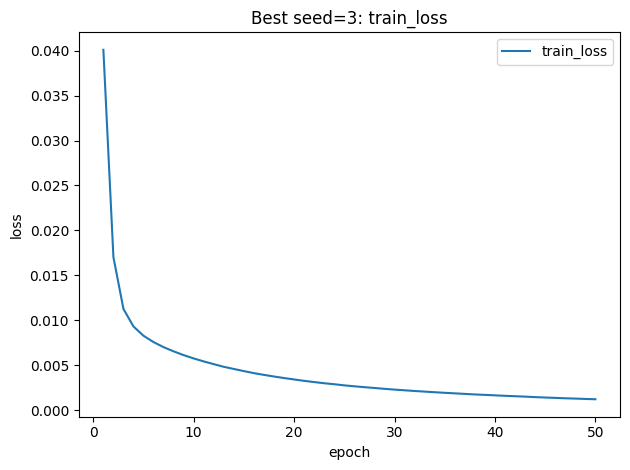

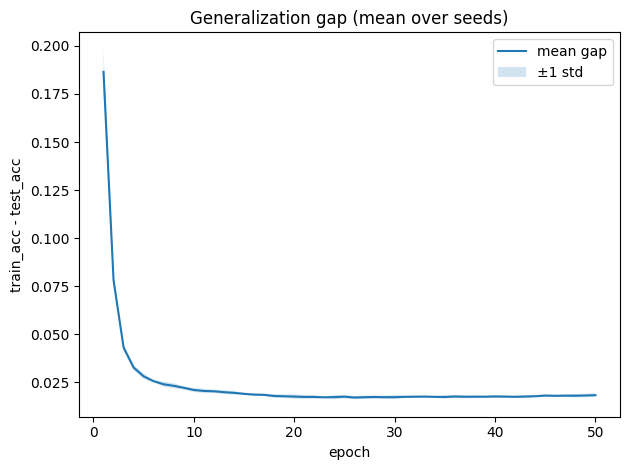

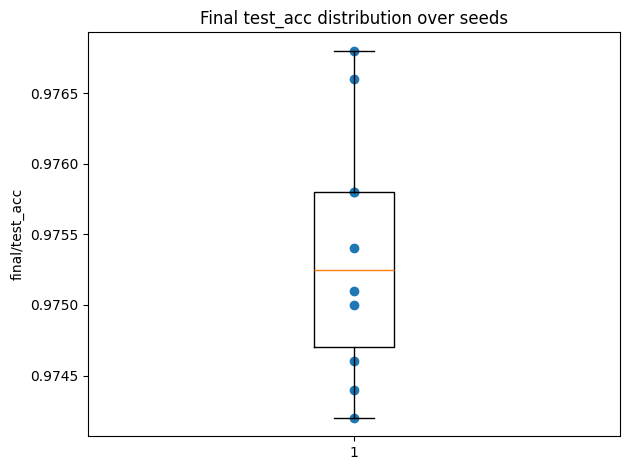

In [7]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = results["df"]  # 你已有

def _extract_epoch_series(df: pd.DataFrame, metric: str, seed_col="config/seed"):
    """
    把 wide 的 epoch_k/metric 列抽成 long:
    return: long_df with columns [seed, epoch, value]
    """
    pat = re.compile(rf"^epoch_(\d+)/{re.escape(metric)}$")
    cols = []
    epochs = []
    for c in df.columns:
        m = pat.match(c)
        if m:
            cols.append(c)
            epochs.append(int(m.group(1)))
    if not cols:
        raise ValueError(f"No columns found for metric='{metric}'. Expected like epoch_k/{metric}")

    order = np.argsort(epochs)
    cols = [cols[i] for i in order]
    epochs = [epochs[i] for i in order]

    out = df[[seed_col] + cols].copy()
    out = out.melt(id_vars=[seed_col], var_name="col", value_name="value")
    out["epoch"] = out["col"].str.extract(r"epoch_(\d+)/")[0].astype(int)
    out = out.drop(columns=["col"]).rename(columns={seed_col: "seed"})
    out = out.sort_values(["seed", "epoch"]).reset_index(drop=True)
    return out

def _mean_std_over_seeds(long_df: pd.DataFrame):
    g = long_df.groupby("epoch")["value"]
    stat = pd.DataFrame({
        "mean": g.mean(),
        "std": g.std(ddof=1)  # sample std
    }).reset_index()
    return stat

def plot_mean_curve(df, metric, title=None, ylabel=None, show_std=True):
    long_df = _extract_epoch_series(df, metric)
    stat = _mean_std_over_seeds(long_df)

    plt.figure()
    plt.plot(stat["epoch"], stat["mean"], label="mean")
    if show_std:
        lo = stat["mean"] - stat["std"]
        hi = stat["mean"] + stat["std"]
        plt.fill_between(stat["epoch"], lo, hi, alpha=0.2, label="±1 std")

    plt.xlabel("epoch")
    plt.ylabel(ylabel or metric)
    plt.title(title or f"Mean over seeds: {metric}")
    plt.legend()
    plt.tight_layout()
    return stat

def best_seed(df, key="final/test_acc"):
    idx = df[key].astype(float).idxmax()
    return int(df.loc[idx, "config/seed"])

def plot_best_seed_curves(df, best_s, metrics=("train_loss","train_acc","test_acc")):
    sub = df[df["config/seed"] == best_s].copy()
    assert len(sub) == 1, f"Expected exactly 1 row for seed={best_s}, got {len(sub)}"
    sub = sub.reset_index(drop=True)

    for metric in metrics:
        long_df = _extract_epoch_series(sub, metric)  # only one seed row
        plt.figure()
        plt.plot(long_df["epoch"], long_df["value"])
        plt.xlabel("epoch")
        plt.ylabel(metric)
        plt.title(f"Best seed={best_s}: {metric}")
        plt.tight_layout()

def plot_best_seed_one_figure(df, best_s):
    """
    如果你想把 best seed 的 train_acc/test_acc 放一张图、train_loss 单独一张图，
    这是更常见的做法（避免双y轴可读性差）。
    """
    sub = df[df["config/seed"] == best_s].copy().reset_index(drop=True)

    # acc 图
    train_acc = _extract_epoch_series(sub, "train_acc")
    test_acc  = _extract_epoch_series(sub, "test_acc")
    plt.figure()
    plt.plot(train_acc["epoch"], train_acc["value"], label="train_acc")
    plt.plot(test_acc["epoch"],  test_acc["value"],  label="test_acc")
    plt.xlabel("epoch"); plt.ylabel("accuracy")
    plt.title(f"Best seed={best_s}: train_acc vs test_acc")
    plt.legend(); plt.tight_layout()

    # loss 图
    train_loss = _extract_epoch_series(sub, "train_loss")
    plt.figure()
    plt.plot(train_loss["epoch"], train_loss["value"], label="train_loss")
    plt.xlabel("epoch"); plt.ylabel("loss")
    plt.title(f"Best seed={best_s}: train_loss")
    plt.legend(); plt.tight_layout()

# -------------------------
# 你要的两张核心图
# -------------------------
# 图1：均值 test_acc（推荐加 std 阴影）
plot_mean_curve(df, "test_acc", title="MNIST: test_acc mean over seeds", ylabel="test_acc", show_std=True)

# 图2：最佳 seed 表现（选择其 final/test_acc 最大）
best_s = best_seed(df, key="final/test_acc")
print("Best seed =", best_s)

# 方案A：三张图分别画（最清晰）
# plot_best_seed_curves(df, best_s, metrics=("train_loss","train_acc","test_acc"))

# 方案B：更常见：acc 合并一张 + loss 单独一张
plot_best_seed_one_figure(df, best_s)

# -------------------------
# 可选：按我之前建议再补两张“论文友好”的图
# -------------------------
# 1) generalization gap（mean±std）
gap_long = _extract_epoch_series(df, "train_acc").merge(
    _extract_epoch_series(df, "test_acc"),
    on=["seed", "epoch"],
    suffixes=("_train", "_test")
)
gap_long["value"] = gap_long["value_train"] - gap_long["value_test"]
gap_stat = _mean_std_over_seeds(gap_long[["seed","epoch","value"]])
plt.figure()
plt.plot(gap_stat["epoch"], gap_stat["mean"], label="mean gap")
plt.fill_between(gap_stat["epoch"], gap_stat["mean"]-gap_stat["std"], gap_stat["mean"]+gap_stat["std"], alpha=0.2, label="±1 std")
plt.xlabel("epoch"); plt.ylabel("train_acc - test_acc")
plt.title("Generalization gap (mean over seeds)")
plt.legend(); plt.tight_layout()

# 2) final/test_acc 分布：箱线 + 每个seed散点
plt.figure()
vals = df["final/test_acc"].astype(float).values
plt.boxplot(vals, vert=True)
plt.scatter(np.ones_like(vals), vals)  # jitter 不加也行
plt.ylabel("final/test_acc")
plt.title("Final test_acc distribution over seeds")
plt.tight_layout()

plt.show()
